In [14]:
import pygad
import gymnasium as gym

env = gym.make('FrozenLake8x8-v1')
observation, info = env.reset(seed=42)

def fitness_func(solution, sol_idx):
    total_reward = 0
    observation = env.reset(seed=42)
    
    for step in range(23):
        action = int(solution[step])
        observation, reward, terminated, truncated, info = env.step(action) 
        total_reward += reward
        if terminated or truncated:
            observation, info = env.reset(seed=42)
    
    return total_reward

Parameters of the best solution : [1 2 1 2 1 1 1 1 2 2 1 0 1 2 2 1 2 0 1 1 1 2 0]
Fitness value of the best solution = 1.0


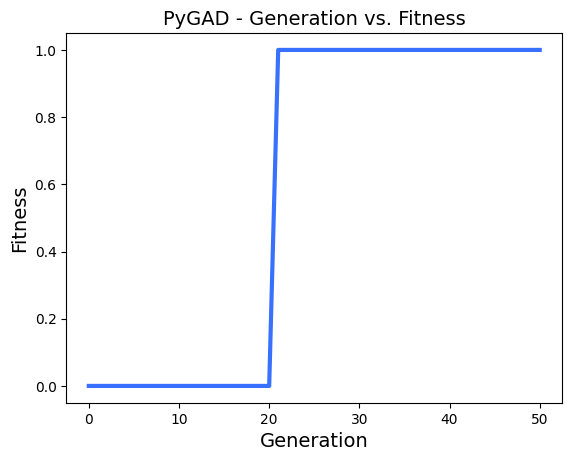

In [15]:
# chromosom - 23 geny, kazdy z nich moze przyjmowac wartosci od 0 do 3 (akcje)

ga_instance = pygad.GA(
    num_generations=50,
    num_parents_mating=100,
    fitness_func=fitness_func,
    sol_per_pop=200,
    num_genes=23,
    gene_type=int,
    init_range_low=0,
    init_range_high=3,
    parent_selection_type="sss",
    keep_parents=1,
    mutation_percent_genes=15,
    mutation_by_replacement=True,
    mutation_type="random",
    random_mutation_min_val=0,
    random_mutation_max_val=3,
)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness();

In [16]:
env = gym.make('FrozenLake8x8-v1', render_mode="human")
observation, info = env.reset(seed=42)

for i in range(len(solution)):
   action = solution[i]  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)   
 
   if terminated or truncated:
      observation, info = env.reset(seed=42)
env.close()